In [2]:
#https://github.com/swar/nba_api -> Link to the API documentation
import requests
import time
"""
url = "https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2019-20&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight="
headers = {
    'Host': 'stats.nba.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:61.0) Gecko/20100101 Firefox/61.0',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'en-US,en;q=0.5',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
    'x-nba-stats-origin': 'stats',
    'x-nba-stats-token': 'true'
}
resp_json = requests.get(url=url, headers=headers).json()
"""

'\nurl = "https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2019-20&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight="\nheaders = {\n    \'Host\': \'stats.nba.com\',\n    \'User-Agent\': \'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:61.0) Gecko/20100101 Firefox/61.0\',\n    \'Accept\': \'application/json, text/plain, */*\',\n    \'Accept-Language\': \'en-US,en;q=0.5\',\n    \'Referer\': \'https://stats.nba.com/\',\n    \'Accept-Encoding\': \'gzip, deflate, br\',\n    \'Connection\': \'keep-alive\',\n    \'x-nba-stats-origin\': \'stats\',\n    \'x-nba-stats-token\': \'true\'\n}\nresp_json = requests.get(url=url, h

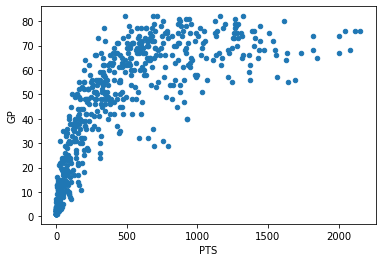

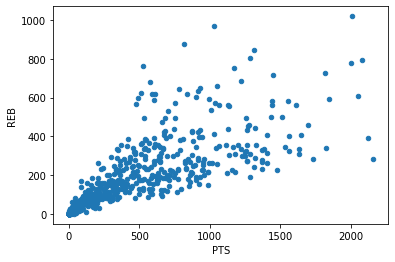

In [12]:
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import teamyearbyyearstats
from nba_api.stats import endpoints
import pandas as pd
import matplotlib.pyplot as plt

# Basic Request
player_info = commonplayerinfo.CommonPlayerInfo(player_id=2544)
playerDict = player_info.get_data_frames()

data = endpoints.leagueleaders.LeagueLeaders()
df = data.league_leaders.get_data_frame()
ax1 = df.plot.scatter(x='PTS', y='GP')
ax2 = df.plot.scatter(x='PTS', y='REB')

In [19]:
"""
Creates a dictionary for each team in the NBA
TeamAbbreviation : WinPercentage
"""

teamID = [] #List to store all team ID's
from nba_api.stats.static import teams
allTeams = teams.get_teams() #List of dictionaries that store all teams
for dicts in allTeams: #Appends all teamID's to teamID list
    teamID.append(dicts['id'])
    
#Creating a dicionary with each team and their total wins in franchise history
teamWinPercentageDict = dict()
for allId in teamID:
    time.sleep(.600) #Stops API timeout errors (Thank you Adam Silver)
    info = endpoints.TeamYearByYearStats(allId).get_data_frames()
    teamName = teams.find_team_name_by_id(allId) #Dictionary of team stats based on ID
    name = teamName['abbreviation']
    totalGamesPlayed = (info[0]['LOSSES'].sum()+info[0]['WINS'].sum())
    teamWinPercentageDict[name] = (info[0]['WINS'].sum()/totalGamesPlayed)
teamNames = list(teamWinPercentageDict.keys())
winPercentages = list(teamWinPercentageDict.values())



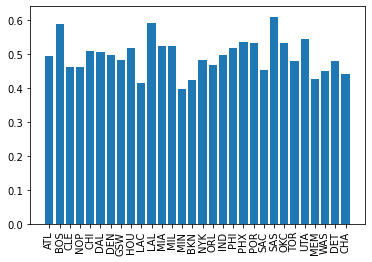

In [21]:
"""
Plots NBA Teams franchise win percentage
TODO: Add functionality to pick win percentage by year (possibly stretch of years)
*Adding this functionality to flask
"""
plt.bar(range(len(teamWinPercentageDict)), winPercentages, tick_label=teamNames)
plt.xticks(rotation=90)
plt.show()

